In [1]:
from operations import *
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def make_compound_binding(H: np.ndarray, num_terms: int, dim: int, translation: int=0, yscale= 1):
    xs = [get_rand_unit_vec(dim, translation) for _ in range(num_terms)]
    ys = [get_rand_unit_vec(dim, translation) * yscale for _ in range(num_terms)]
    binding = np.zeros((dim,))
    for i in range(num_terms):
        binding += bind(H, xs[i], ys[i])
    return binding, xs, ys

<Axes: title={'center': 'Negative Results - unbind cosine similarity'}>

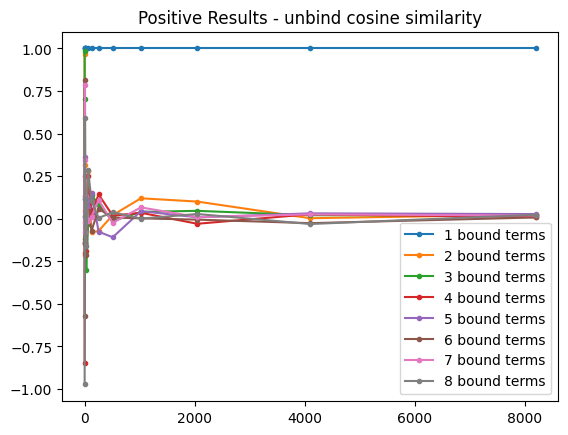

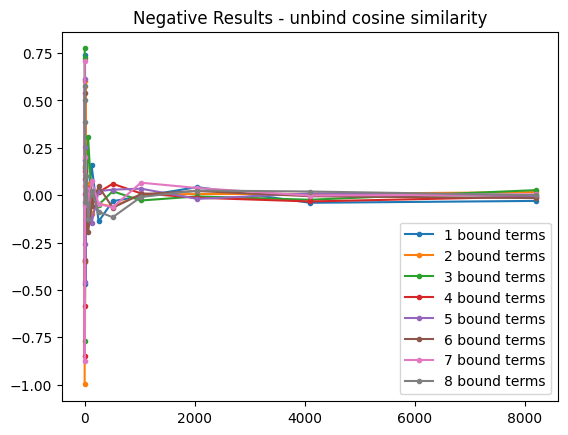

In [3]:
# Test 1: cosine similarity between expected vector, x, and obtained vector, ~x, for bindings of varying levels of complexity versus dimension size
STOP_DIM = 13 + 1
MAX_BINDING = 8 + 1

haar_by_dim = {}
for i in range(1, STOP_DIM):
    haar_by_dim[i] = make_ortho_haar(i)

pos_results = {}
neg_results = {}
for num_bindings in range(1, MAX_BINDING):

    pos_dim_results = []
    neg_dim_results = []
    for dim in range(1, STOP_DIM):
        H = haar_by_dim[dim]        
        # bound = BIND(xs[0], ys[0]) + BIND(xs[1], ys[1]) + ... + BIND(xs[num_bindings], ys[num_bindings])
        bound, xs, ys = make_compound_binding(H, num_bindings, 2**dim)
        # unique negative that does not appear in the vector
        negative = get_rand_unit_vec(2**dim)

        # unbind a y to get x
        pos_result = unbind(H, ys[0], bound)
        # unbind something that isn't present
        neg_result = unbind(H, negative, bound)

        true_result = xs[0]

        pos_dim_results.append( cos_sim(pos_result, true_result) )
        neg_dim_results.append( cos_sim(neg_result, true_result) )
    
    pos_results[f"{num_bindings} bound terms"] = pos_dim_results
    neg_results[f"{num_bindings} bound terms"] = neg_dim_results

pos_df = pd.DataFrame.from_dict(pos_results, orient='index', columns = [2**n for n in range(1,STOP_DIM)])
neg_df = pd.DataFrame.from_dict(neg_results, orient='index', columns = [2**n for n in range(1,STOP_DIM)])

pos_df.T.plot(title="Positive Results - unbind cosine similarity", style='.-')
neg_df.T.plot(title="Negative Results - unbind cosine similarity", style='.-')

<Axes: title={'center': 'Negative Results - cosine similarity contains'}>

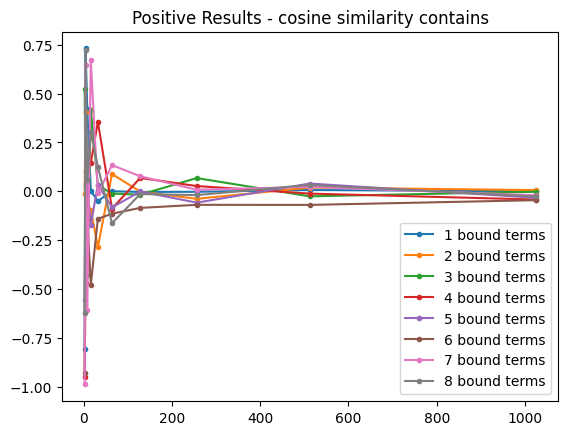

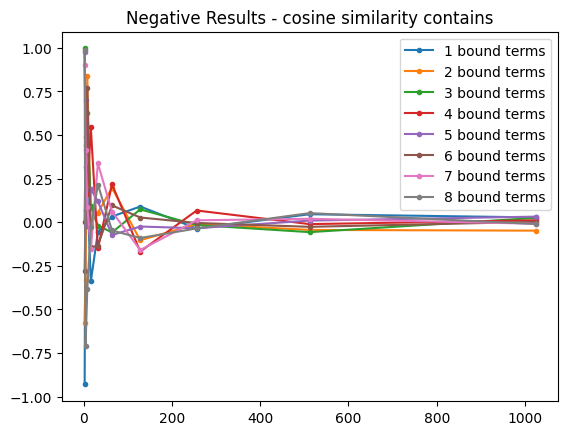

In [4]:
# Test 2: cosine similarity contains for expected positive and negative results
STOP_DIM = 10 + 1
MAX_BINDING = 8 + 1

haar_by_dim = {}
for i in range(1, STOP_DIM):
    haar_by_dim[i] = make_ortho_haar(i)

pos_results = {}
neg_results = {}
for num_bindings in range(1, MAX_BINDING):

    pos_dim_results = []
    neg_dim_results = []
    for dim in range(1, STOP_DIM):
        H = haar_by_dim[dim]        
        # bound = BIND(xs[0], ys[0]) + BIND(xs[1], ys[1]) + ... + BIND(xs[num_bindings], ys[num_bindings])
        bound, xs, ys = make_compound_binding(H, num_bindings, 2**dim)
        # unique negative that does not appear in the vector
        negative = get_rand_unit_vec(2**dim)

        # Check if xs[0] in bound
        pos_result = contains_cos_sim(H, ys[0], bound)
        
        neg_result = contains_cos_sim(H, negative, bound)

        true_result = xs[0]

        pos_dim_results.append( pos_result )
        neg_dim_results.append( neg_result )
    
    pos_results[f"{num_bindings} bound terms"] = pos_dim_results
    neg_results[f"{num_bindings} bound terms"] = neg_dim_results

pos_df = pd.DataFrame.from_dict(pos_results, orient='index', columns = [2**n for n in range(1,STOP_DIM)])
neg_df = pd.DataFrame.from_dict(neg_results, orient='index', columns = [2**n for n in range(1,STOP_DIM)])

pos_df.T.plot(title="Positive Results - cosine similarity contains", style='.-')
neg_df.T.plot(title="Negative Results - cosine similarity contains", style='.-')

<Axes: title={'center': 'Positive Results - contains dot ratio'}>

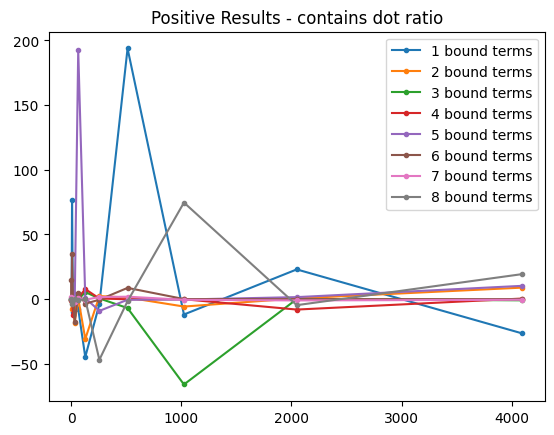

In [5]:
# Test 3: dot product ratio contains for expected positive and negative results
STOP_DIM = 12 + 1
MAX_BINDING = 8 + 1

haar_by_dim = {}
for i in range(1, STOP_DIM):
    haar_by_dim[i] = make_ortho_haar(i)

results = {}
for num_bindings in range(1, MAX_BINDING):

    dim_results = []
    for dim in range(1, STOP_DIM):
        H = haar_by_dim[dim]        
        # bound = BIND(xs[0], ys[0]) + BIND(xs[1], ys[1]) + ... + BIND(xs[num_bindings], ys[num_bindings])
        bound, xs, ys = make_compound_binding(H, num_bindings, 2**dim)
        # unique negative that does not appear in the vector
        negative = get_rand_unit_vec(2**dim)

        # Check if xs[0] in bound
        pos_result = contains_dot(H, ys[0], bound)
        
        neg_result = contains_dot(H, negative, bound)

        dim_results.append(neg_result / pos_result)
    
    results[f"{num_bindings} bound terms"] = dim_results

df = pd.DataFrame.from_dict(results, orient='index', columns = [2**n for n in range(1,STOP_DIM)])

df.T.plot(title="Positive Results - contains dot ratio", style='.-')

<Axes: title={'center': 'Contains dot ratio - neg result / pos result'}>

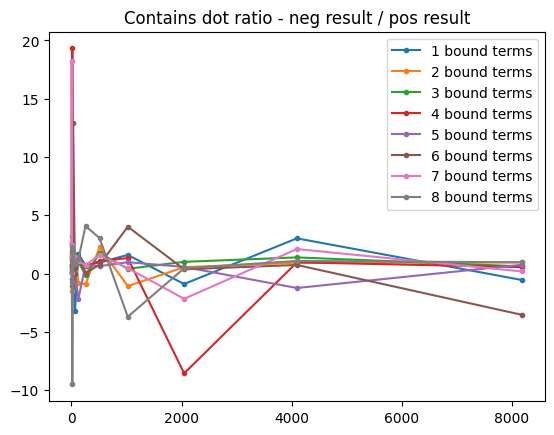

In [6]:
# Test 4: dot product ratio contains for expected positive and negative results, but all vectors translated by (1, 1, 1,...)

START_DIM = 1
STOP_DIM = 13 + 1
MAX_BINDING = 8 + 1
translation = 1
yscale = 1

haar_by_dim = {}
for i in range(START_DIM, STOP_DIM):
    haar_by_dim[i] = make_ortho_haar(i)

results = {}
for num_bindings in range(1, MAX_BINDING):

    dim_results = []
    for dim in range(START_DIM, STOP_DIM):
        H = haar_by_dim[dim]        
        # bound = BIND(xs[0], ys[0]) + BIND(xs[1], ys[1]) + ... + BIND(xs[num_bindings], ys[num_bindings])
        bound, xs, ys = make_compound_binding(H, num_bindings, 2**dim, translation, yscale=yscale)
        # unique negative that does not appear in the vector
        negative = get_rand_unit_vec(2**dim, translation) * yscale

        # Check if xs[0] in bound
        pos_result = contains_dot(H, ys[0], bound)
        
        neg_result = contains_dot(H, negative, bound)

        dim_results.append(neg_result / pos_result)
    
    results[f"{num_bindings} bound terms"] = dim_results

df = pd.DataFrame.from_dict(results, orient='index', columns = [2**n for n in range(START_DIM, STOP_DIM)])

df.T.plot(title="Contains dot ratio - neg result / pos result", style='.-')

<Axes: title={'center': 'Negative Results - unbind cosine similarity'}>

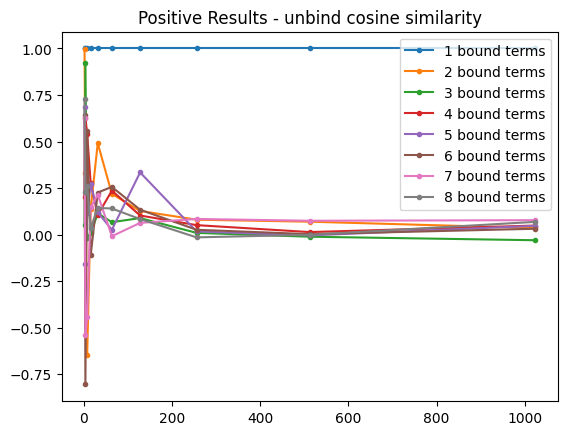

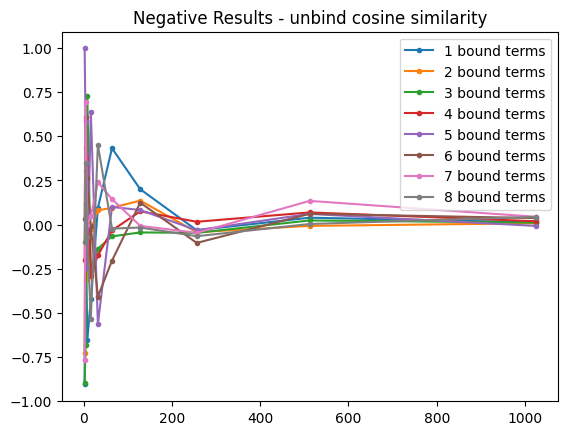

In [7]:
# Test 5: cosine similarity between expected vector, x, and obtained vector, y, for bindings of varying levels of complexity versus dimension size
# increased magnitude y vectors
STOP_DIM = 10 + 1
MAX_BINDING = 8 + 1
yscale = 1000

haar_by_dim = {}
for i in range(1, STOP_DIM):
    haar_by_dim[i] = make_ortho_haar(i)

pos_results = {}
neg_results = {}
for num_bindings in range(1, MAX_BINDING):

    pos_dim_results = []
    neg_dim_results = []
    for dim in range(1, STOP_DIM):
        H = haar_by_dim[dim]        
        # bound = BIND(xs[0], ys[0]) + BIND(xs[1], ys[1]) + ... + BIND(xs[num_bindings], ys[num_bindings])
        bound, xs, ys = make_compound_binding(H, num_bindings, 2**dim, yscale=yscale)
        
        # unique negative that does not appear in the vector
        negative = get_rand_unit_vec(2**dim) * yscale
        # unbind a y to get x
        pos_result = unbind(H, ys[0], bound)
        # unbind something that isn't present
        neg_result = unbind(H, negative, bound)

        true_result = xs[0]

        pos_dim_results.append( cos_sim(pos_result, true_result) )
        neg_dim_results.append( cos_sim(neg_result, true_result) )
    
    pos_results[f"{num_bindings} bound terms"] = pos_dim_results
    neg_results[f"{num_bindings} bound terms"] = neg_dim_results

pos_df = pd.DataFrame.from_dict(pos_results, orient='index', columns = [2**n for n in range(1,STOP_DIM)])
neg_df = pd.DataFrame.from_dict(neg_results, orient='index', columns = [2**n for n in range(1,STOP_DIM)])

pos_df.T.plot(title="Positive Results - unbind cosine similarity", style='.-')
neg_df.T.plot(title="Negative Results - unbind cosine similarity", style='.-')